<table>
    <tr>
        <td><img src="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Logo_EICT_horizontal_ESPANOL%20(1).png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> Ejemplos </p> Aprendizaje Supervisado </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Machine Learning </p></tp>
            <tp><p style="font-size:115%;text-align:center">A. Supervisado</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

# <FONT SIZE=5 COLOR="purple"> 1. Ejemplo 1 : Clasificación </FONT>

***Objetivo del ejercicio***. Aplicar el modelo de clasificación ***KNN-Reglog-Árboles-Red*** para determinar cuando se aprueba a un cliente una tarjeta de crédito o no, dependiendo de las otras variables.


***Contexto de los datos***

Este ejercicio se basa en un conjunto de datos que se publicó originalmente junto con la quinta edición del libro *Análisis Econométrico* de William Greene.

Este libro tiene datos de tarjetas de crédito que se componen de una variable objetivo que es de naturaleza binaria (1 si se aprueba la solicitud de tarjeta de crédito, 0 si no) y algunas variables independientes sobre la demografía y el historial crediticio de los titulares de tarjetas de crédito.

Los datos para este trabajo están en *kaggle* en la siguiente *url*.

https://www.kaggle.com/datasets/dansbecker/aer-credit-card-data?select=AER_credit_card_data.csv

Sin embargo, se anexan los datos como ***credict3*** y este trabajo se va a desarrollar con esta base.

```python
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/credit3.csv"
```

Cada fila representa una solicitud de tarjeta de crédito, cada columna contiene los atributos del solicitante:

- *tarjeta*: variable ficticia, 1 si se aprueba la solicitud de tarjeta de crédito, 0 si no

- *informes*: número de informes despectivos importantes.

- *edad*: Edad n años más doceavos de un año.

- *ingreso*: ingreso anual (dividido por 10,000).

- *participación*: relación entre el gasto mensual de la tarjeta de crédito y el ingreso anual.

- *gasto*: gasto medio mensual con tarjeta de crédito.

- *propietario*: 1 si es dueño de su casa, 0 si alquila.

- *selfemp*: 1 si es autónomo, 0 si no.

- *dependientes*: 1 + número de dependientes.

- *meses*: Meses viviendo en la dirección actual.

- *majorcards*: número de las principales tarjetas de crédito que se tienen.

- activo: Número de cuentas de crédito activas.

Según Greene (2003, p. 952) los dependientes equivalen a 1 + número de dependientes. Eso se describe arriba. Los autores del paquete “AER” en R creen que es el número de dependientes.

Algunas precisiones sobre las variables

- *Los informes promedio* (es decir, el número promedio de informes despectivos importantes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El ingreso promedio* (es decir, el ingreso anual promedio dividido por 10,000) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *La participación promedio* (es decir, la relación promedio entre el gasto mensual de la tarjeta de crédito y el ingreso anual) de los solicitantes que fueron aprobados es más alta que la de los solicitantes que no fueron aprobados.

- *El gasto promedio* (es decir, el gasto mensual promedio con tarjeta de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *El promedio de dependientes*(es decir, el número promedio de dependientes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El promedio de tarjetas principales (es decir, el número promedio de las principales tarjetas de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.


In [ ]:
pip install imblearn


## <FONT SIZE=5 COLOR="blue"> 1.1 Cargar las librerías de trabajo </FONT>

In [ ]:
# Manipulación de data.frames
import pandas as pd
import numpy as np

# Librerías para Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento
from sklearn.preprocessing      import StandardScaler, MinMaxScaler
from sklearn.preprocessing      import LabelEncoder
from sklearn.compose            import ColumnTransformer
from sklearn.pipeline           import Pipeline

# Para modelos de machine learning
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.tree               import DecisionTreeClassifier

# Métricas de evaluación
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics           import specificity_score

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV
# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

## <FONT SIZE=5 COLOR="blue"> 1.2 Carga y exploración rápida de los datos</FONT>



In [ ]:
# cargar los datos que están la dirección del github
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/credit3.csv"
credit = pd.read_csv(url, na_values=[" "])

Nota: la expresión *na_values=[" "]* se usa para que python identifique como datos faltantes (not available) espacios en blanco

Exploremos un poco los datos, para identificar problemas

In [7]:
# Ver las primeras filas
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [8]:
# ver las últimas filas
credit.tail()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1314,yes,0,33.58333,4.566,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.192,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.600,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.700,0.008999,26.996670,no,yes,0,60,1,7
1318,yes,0,48.25000,3.700,0.111619,344.157500,yes,no,2,2,1,0


In [10]:
# nombre de las variables
credit.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [11]:
# tamaño de los datos
credit.shape

(1319, 12)

In [12]:
# información de las variables
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1317 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   object 
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 123.8+ KB


Se observa que:
- Algunas variables son tipo object

- La variable *age* tiene dos datos menos

- La variable *months* no está bien cargada

In [13]:
# estadísticas generales
credit.describe()

,reports,age,income,share,expenditure,dependents,majorcards,active
count,1319.000000,1317.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.200392,3.365376,0.068732,185.057071,0.993935,0.817286,6.996967
std,1.345267,10.145220,1.693902,0.094656,272.218917,1.247745,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,1.000000,6.000000
75%,0.000000,39.333330,4.000000,0.093617,249.035800,2.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,1.000000,46.000000


In [14]:
# revisamos los valores de la variable card
credit.card.value_counts()

yes    1021
no      294
Yes       2
No        2
Name: card, dtype: int64

identificamos que no están unificados. Revisaremos las otras variables

In [15]:
# Valores únicos por columna para detectar posibles inconsistencias
for col in list(credit.select_dtypes(include='object').columns):
  print("----")
  print(f"Valores únicos en {col}: {credit[col].unique()}")


----
Valores únicos en card: ['yes' 'no' 'Yes' 'No']
----
Valores únicos en owner: ['yes' 'no']
----
Valores únicos en selfemp: ['no' 'yes']
----
Valores únicos en months: ['54' '34' '58' '25' '64' '7' '77' '97' '65' '24' '36' '42' '26' '12o'
 '168' '96' '60' '28' '115' '12' '18' '13' '38' '74' '9' '14' '4o' '108'
 '46' '2' '8' '156' '98' '30' '0' '6' '48' '216' '33' '20' '3' '16' '182'
 '78' '4' '53' '144' '5' '94' '37' '3o' '15' '177' '172' '288' '87' '69'
 '161' '72' '1' '51' '120' '126' '27' '32' '52' '114' '180' '41' '67' '62'
 '84' '264' '164' '55' '57' '50' '11' '10' '17' '61' '128' '56' '45' '19'
 '252' '23' '35' '43' '300' '31' '76' '121' '21' '230' '204' '179' '40'
 '80' '59' '93' '49' '22' '408' '44' '63' '372' '113' '106' '90' '540'
 '188' '146' '301' '192' '150' '85' '133' '131' '270' '102' '151' '70'
 '125' '159' '101' '75' '117' '132' '158' '200' '210' '250' '109' '240'
 '268' '162' '135' '66' '110' '134' '160' '122' '86' '95' '186' '68' '138'
 '88' '244' '511' '29' '104

In [16]:
# gráfico de cajas de la variable age
px.box(credit["age"])

In [17]:
credit = credit[credit["age"]>=18]

In [18]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1310 non-null   object 
 1   reports      1310 non-null   int64  
 2   age          1310 non-null   float64
 3   income       1310 non-null   float64
 4   share        1310 non-null   float64
 5   expenditure  1310 non-null   float64
 6   owner        1310 non-null   object 
 7   selfemp      1310 non-null   object 
 8   dependents   1310 non-null   int64  
 9   months       1310 non-null   object 
 10  majorcards   1310 non-null   int64  
 11  active       1310 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 133.0+ KB


## <FONT SIZE=5 COLOR="blue"> 1.3 Alistamiento de los datos</FONT>

1. A primera vista, del resultado del método `info()`, se puede observar que hacen falta 2 valores en la variable `age`. Al ser numérica, se sustituirá por el promedio de la variable.

In [19]:
credit['age'].fillna(credit['age'].mean(), inplace=True)
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1310 non-null   object 
 1   reports      1310 non-null   int64  
 2   age          1310 non-null   float64
 3   income       1310 non-null   float64
 4   share        1310 non-null   float64
 5   expenditure  1310 non-null   float64
 6   owner        1310 non-null   object 
 7   selfemp      1310 non-null   object 
 8   dependents   1310 non-null   int64  
 9   months       1310 non-null   object 
 10  majorcards   1310 non-null   int64  
 11  active       1310 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 133.0+ KB


2. Debemos unificar los nombres de las categorias de la variable card y además convertir en 1 y 0 las categorias de las variables "owner" y "selftemp"

In [20]:
# vamos a unificar los nombre de las categorias y cambiar por 1 y 0

# variable card
credit['card'] = credit['card'].apply(lambda x: 1 if x in ['yes','Yes'] else 0)

# variable owner
credit['owner'] = credit['owner'].apply(lambda x: 1 if x=='yes' else 0)

#variable selftemp
credit['selfemp'] = credit['selfemp'].apply(lambda x: 1 if x=='yes' else 0)


In [21]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1310 non-null   int64  
 1   reports      1310 non-null   int64  
 2   age          1310 non-null   float64
 3   income       1310 non-null   float64
 4   share        1310 non-null   float64
 5   expenditure  1310 non-null   float64
 6   owner        1310 non-null   int64  
 7   selfemp      1310 non-null   int64  
 8   dependents   1310 non-null   int64  
 9   months       1310 non-null   object 
 10  majorcards   1310 non-null   int64  
 11  active       1310 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 133.0+ KB


3. Al momento de digitar algunos valores numéricos de la variable "month", la persona se equivocó y digitó algunas letras. En la variable `months` existen valores como '12o', que es de suponer que corresponde a 120, por lo que habría que convertirlo, para posteriormente convertir toda la variable a tipo entero. En general el procedimiento aquí sería convertir las 'o' por '0'.

In [22]:
# cambiar las letras por números
credit['months'] = credit['months'].apply(lambda x: x.replace('o','0'))
# convertir months a numérica
credit['months'] = credit['months'].astype(int)

In [23]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1310 non-null   int64  
 1   reports      1310 non-null   int64  
 2   age          1310 non-null   float64
 3   income       1310 non-null   float64
 4   share        1310 non-null   float64
 5   expenditure  1310 non-null   float64
 6   owner        1310 non-null   int64  
 7   selfemp      1310 non-null   int64  
 8   dependents   1310 non-null   int64  
 9   months       1310 non-null   int64  
 10  majorcards   1310 non-null   int64  
 11  active       1310 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 133.0 KB


Hasta acá tenemos una nueva aproximación de datos limpios y continuamos a nuestra siguiente etapa.

## <FONT SIZE=5 COLOR="blue"> 1.4 Definir las variables, conjuntos de entrenamiento y prueba y escalar </FONT>

Revisemos los datos

In [24]:
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


Lo primero que vamos a hacer es separar las columnas que representan variables continuas y las que son categóricas.

In [25]:
# nombre de las columnas
credit.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [26]:
variables_num = credit.drop(["card","owner","selfemp"], axis =1).columns
variables_num

Index(['reports', 'age', 'income', 'share', 'expenditure', 'dependents',
       'months', 'majorcards', 'active'],
      dtype='object')

In [27]:
variables_cat = ["owner", "selfemp"]
variables_cat

['owner', 'selfemp']

In [28]:
# Dividir en dos conjuntos
# las variables predictoras
X = credit.drop("card", axis=1)
# la variable objetivo
y = credit["card"]
# conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    stratify=y,               # estratificamos con respecto a y (asegura que se mantenga la proporción de clases en y)
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.3)          # tamaño del conjunto de prueba

# Definitmos el preprocesador de escalamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), variables_num),
    ('cat', 'passthrough', variables_cat)
])

## <FONT SIZE=5 COLOR="blue"> 1.5 Generar los modelos de clasificación </FONT>

En esta sección usaremos los algoritmos:

- k-vecinos más cercanos
- regresión logística
- árboles de decisión

### <FONT SIZE=5 COLOR="magenta"> K-vecinos más cercanos </FONT>

In [29]:
# definimos el modelo de vecinos más cercanos
KNN = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('classifier', KNeighborsClassifier(n_neighbors = 10,
                                          metric = 'euclidean'))
      ])
# entrenamos el modelo
KNN.fit(X_train,y_train)
# se utiliza la función .predict
y_pred_knn = KNN.predict(X_test)


In [30]:
y_pred_knn

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [31]:
np.array(y_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,

La matriz de confusión compara los valores reales y los valores de predicción.

,metrics,values
0,accuracy,0.877863
1,recall,0.950820
2,specificity,0.625000
3,precision,0.897833
4,f1,0.923567


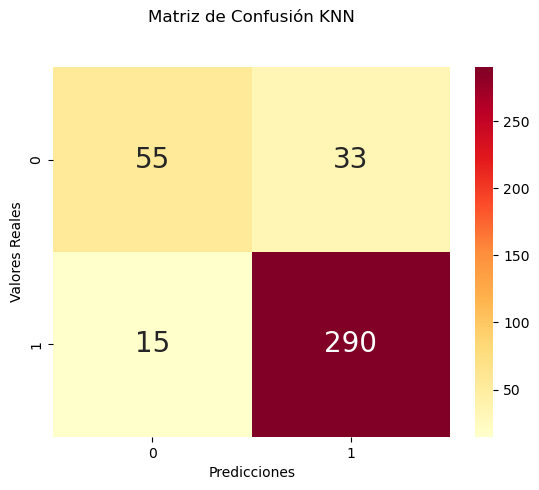

In [32]:
# Evaluamos el modelo
metrics=["accuracy", "recall" , "specificity", "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred_knn),
          recall_score(y_test,y_pred_knn),
          specificity_score(y_test,y_pred_knn),
          precision_score(y_test,y_pred_knn),
          f1_score(y_test,y_pred_knn)]
pd.DataFrame({"metrics": metrics , "values" : values})
# matriz de confusión
MC= confusion_matrix(y_test, y_pred_knn)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión KNN', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones');
pd.DataFrame({"metrics": metrics , "values" : values})

<FONT SIZE=5 COLOR="purple"> Sobre la Matriz de Confusión </FONT>

En el campo del Machine Learning la **matriz de confusión** es una herramienta que permite visualizar el desempeño de un algoritmo de clasificación.

- Las columnas de la matriz representa el número de predicciones de cada clase.

- Las filas representan las instancias en la clase real.

Esta matriz permite ver qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.

En el siguiente gráfico se muestra lo anterior

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/metricas.png?raw=true" alt="centered image" width="500" height="400"></center>
<br>

Para entender la matriz de confusión veamos algunas definiciones:

**Verdadero positivo:** El valor real es positivo y la prueba predice también que es positivo.

- La persona estaba enferma y el modelo predice bien que estaba enferma. *Predicción correcta*

**Verdadero negativo:** El valor real es negativo y la prueba predice también que el resultado es negativo.

- La persona no está enferma y el modelo predice que no está enferma. *Predicción correcta*

**Falso negativo:** El valor real es positivo, y la prueba predice que el resultado es negativo.

- La persona esta enferma y el modelo predice que no lo está. *predicción incorrecta* : error tipo II

**Falso positivo:** El valor real es negativo, y la prueba predice que el resultado es positivo.

- La persona no está enferma y el modelo predice que lo está. *predicción incorrecta* : error tipo I

Veamos las métricas que se utilizan para evaluar el modelo.

## <FONT SIZE=5 COLOR="green"> Métricas Utilizadas para evaluar un modelo </FONT>

<FONT SIZE=5 COLOR="green"> 1. Accuracy (exactitud) </FONT>

- Es el porcentaje de predicciones correctas de todo el modelo.

- Es la proporción de resultados verdaderos (tanto verdaderos positivos (VP) como verdaderos negativos (VN)) dividido entre el número total de casos examinados (verdaderos positivos, falsos positivos, verdaderos negativos, falsos negativos)

$$Accurary = \dfrac{VP+VN}{VP+FN+VN+FP}$$

Observación: Si los datos están desbalanceados se debe revisar con cuidado, ya que el rendimiento general puede ser alto, pero en una de las categorias o clases no se evidencian buenos resultados. Veamos el siguiente ejemplo

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/confusión_ej1.PNG?raw=true" alt="centered image" width="600" height="400"></center>
<br>

- Se está detectando *spam* y el rendimiento del modelo es $94\%$. Sin embargo, el *recall* es de solo el $16\%$ que es la clase que quiero detectar

<FONT SIZE=5 COLOR="green"> 2. Recall (sensibilidad) </FONT>

Es el porcentaje de los casos positivos reales que fueron detectados correctamente por el modelo. Es decir es la tasa de verdaderos positivos o **True Positive Rate (TPR)**.

$$recall = \dfrac{VP}{VP+FN}$$

- *En el área de la salud se dice que la sensibilidad o recall es la capacidad de de poder detectar correctamente la enfermedad entre los enfermos*


- El *recall* prioriza la detección de los casos positivos. Es conveniente usarlo cuando los falsos negativos resultan costosos para el contexto.

- **Observaciones**: ¿Cuándo usar esta métrica?
   
- Se usa si los falsos negativos son inaceptables en el contexto.

   - **Diagnóstico médico:** Mejor detectar a más pacientes enfermos, aunque haya falsos positivos.

   - **Sistemas de seguridad:** Mejor marcar posibles amenazas, aunque algunas sean erróneas.

   - **Reconocimiento facial en aeropuertos:** Detectar terroristas aunque algunos pasajeros inocentes sean revisados.

- No se usa si los falsos positivos dan problema en el contexto.

   - **Detección de fraude:** No se puede marcar muchas transacciones legítimas como fraude.

   - **Clasificación de correos spam:** No queremos que correos importantes terminen en spam.

<FONT SIZE=5 COLOR="green"> 3. Precision (Precisión) </FONT>

- Es la proporción de verdaderos positivos dividido entre los resultados etiquetados como positivos.

- Indica qué tan confiables son las predicciones positivas de un modelo de clasificación. Muy útil cuando los Falsos Positivos (FP) son costosos y se quiere evitar predicciones incorrectas de la clase positiva.

$$Precision = \dfrac{VP}{VP+FP}$$

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/confusión_ej2.PNG?raw=true" alt="centered image" width="600" height="400"></center>
<br>

- Esta métrica no funciona bien si los datos están desbalanceados.

- No es útil si los falsos negativos (FN) son más graves que los falsos positivos. Por ejemplo, en detección de terremotos, es preferible dar muchas alertas (FP) antes que ignorar un sismo real (FN).

<FONT SIZE=5 COLOR="green"> 4. Especifity (Especificidad) </FONT>

- Es la proporción de casos negativos que fueron correctamente identificadas por el algoritmo. Es decir, es la tasa de  Verdaderos Negativos.

$$Especifity = \dfrac{VN}{VN+FP}$$

*En el area de la salud se dice que la especificidad es la capacidad de poder identificar los casos de pacientes sanos entre todos los sanos*

- **Ventajas de la Especificidad**

   - Minimiza los falsos positivos (FP). Es clave cuando un falso positivo tiene consecuencias graves, como una sanción injusta. Por ejemplo, en la detección de terrorismo, se queremos marcar inocentes como sospechosos.
   - Ideal en sistemas donde una decisión errónea tiene altos costo Por ejemplo: en juicios legales, es preferible evitar condenar a inocentes (baja FP), aunque algunos culpables escapen.

- **Desventajas de la Especificidad**

  - No considera los falsos negativos (FN). Un modelo con alta especificidad puede fallar en detectar muchos casos positivos. Por ejemplo: Si un test de cáncer prioriza especificidad sobre sensibilidad, muchos pacientes enfermos podrían quedar sin diagnóstico.

  - No es útil en detección temprana de enfermedades o fraudes. En casos donde es crítico detectar todos los positivos, la especificidad puede ser menos importante que el recall. Ejemplo: En detección de fraude bancario, preferimos marcar algunos falsos positivos que perder fraudes reales.
  
  - No funciona bien si la clase negativa es mucho más frecuente. En un dataset desbalanceado, la especificidad puede parecer alta simplemente porque hay muchos negativos.

<FONT SIZE=5 COLOR="green"> 5. F1-Score </FONT>

- Esta una métrica muy empleada porque nos resume la precisión y sensibilidad en una sola métrica, es decir, combina a precision con recall. Por ello es de gran utilidad cuando la distribución de las clases es desigual, por ejemplo cuando el número de pacientes con una condición es del 15% y el otro es 85%.

- Es la media armónica de precision y recall. Esto implica que penaliza valores muy dispares entre estas métricas

$$F1 = \dfrac{2*precision*recall}{precision+recall} $$

$$ F1= \dfrac{2}{ \dfrac{1}{precision}+\dfrac{1}{recall}} $$

- **Ventajas del F1-Score**

   - Equilibra precisión y recall. Es útil cuando una métrica es mucho más alta que la otra. Evita que un modelo con alta precisión y bajo recall o alto recall y baja precisión tenga una puntuación engañosa.

   - Funciona bien en datos desbalanceados. Accuracy no es útil en datasets desbalanceados, pero F1-score sí.

   - Fácil de interpretar y comparar entre modelos.

Si un modelo tiene mejor F1-score que otro, en general es superior.

- **Desventajas del F1-Score**

   - No diferencia entre falsos positivos y falsos negativos. En algunos casos, los FN son más costosos que los FP (ej. detección de cáncer). En otros casos, los FP son más costosos que los FN (ej. detección de fraude bancario).

   - No considera la especificidad.  No mide qué tan bien el modelo predice los negativos correctamente.

   - Puede ser engañoso en ciertos casos. Si los costos de FP y FN son muy diferentes, es mejor analizar precisión y recall por separado.


***Algunas observaciones (resumen)***:

**Alta precisión y alto recall**: el modelo de Machine Learning escogido maneja perfectamente esa clase.

**Alta precisión y bajo recall**: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.

**Baja precisión y alto recall**: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.

**Baja precisión y bajo recall**: El modelo de Machine Learning escogido no logra clasificar la clase correctamente.

- Cuando se tiene un conjunto de datos con clases **desbalanceadas**, suele ocurrir que obtenemos un alto valor de precisión en la clase mayoritaria y un bajo recall en la clase minoritaria.  En el campo de la salud esta circunstancia es particularmente frecuente y se debe recurrir al balanceo de clases.

- La precisión es un gran estadístico, pero es útil únicamente cuando se tienen conjuntos de datos simétricos (la cantidad de casos de la clase 1 y de las clase 2 tienen magnitudes similares)

- El indicador F1 de la matriz de confusión es útil si se tiene una distribución de clases desigual.

- Elija mayor precisión para conocer qué tan seguro está de los verdaderos positivos, Mientras que la sensibilidad o “Recall” le servirá para saber si no está perdiendo positivos.

- Las Falsas Alarmas:  Por ejemplo,  si cree que es mejor en su caso tener falsos positivos que falsos negativos, utilice una sensibilidad alta  (Recall) , cuando la aparición de falsos negativos le resulta inaceptable pero no le importa tener falsos positivos adicionales (falsas alarmas). Un ejemplo de esto es:  Prefieres que algunas personas sanas sean etiquetadas como diabéticas en lugar de dejar a una persona diabética etiquetada como sana.

- Elija precisión (precision en inglés)  si quiere estar más seguro de sus verdaderos positivos. por ejemplo, correos electrónicos no deseados.  En este caso se prefiere tener algunos correos electrónicos “no deseados” en su bandeja de entrada en lugar de tener correos electrónicos “reales” en su bandeja de SPAM.

- Elija alta Especificidad si desea identificar los verdaderos negativos, o lo que es igual cuando no desea falsos positivos. Por ejemplo conductores y las pruebas de alcoholemia

Referencia : https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/



### <FONT SIZE=5 COLOR="magenta"> Modelo Regresión Logística </FONT>

In [33]:
# definimos el modelo de regresión logística
Reg_log = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('classifier', LogisticRegression())
      ])
Reg_log = LogisticRegression()
# entrenamos el modelo
Reg_log.fit(X_train,y_train)
# se utiliza la función .predict
y_pred_log = Reg_log.predict(X_test)

,metrics,values
0,accuracy,0.977099
1,recall,0.970492
2,specificity,1.000000
3,precision,1.000000
4,f1,0.985025


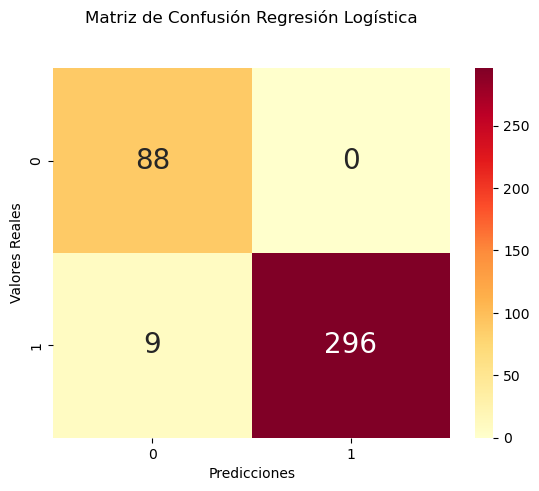

In [34]:
# Evaluamos el modelo
metrics=["accuracy", "recall" , "specificity", "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred_log),
          recall_score(y_test,y_pred_log),
          specificity_score(y_test,y_pred_log),
          precision_score(y_test,y_pred_log),
          f1_score(y_test,y_pred_log)]
pd.DataFrame({"metrics": metrics , "values" : values})
# matriz de confusión
MC= confusion_matrix(y_test, y_pred_log)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión Regresión Logística', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
pd.DataFrame({"metrics": metrics , "values" : values})

### <FONT SIZE=5 COLOR="magenta"> Modelo de Árboles de Decisión </FONT>

In [35]:
# definimos el modelo de árboles de decisión
Dec_Tree = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('classifier', DecisionTreeClassifier())
      ])
# entrenamos el modelo
Dec_Tree.fit(X_train,y_train)
# se utiliza la función .predict
y_pred_tree = Dec_Tree.predict(X_test)


,metrics,values
0,accuracy,0.966921
1,recall,0.980328
2,specificity,0.920455
3,precision,0.977124
4,f1,0.978723


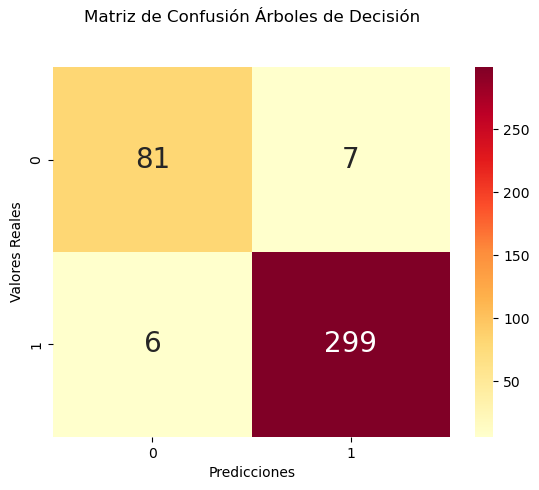

In [36]:
# Evaluamos el modelo
metrics=["accuracy", "recall" , "specificity", "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred_tree),
          recall_score(y_test,y_pred_tree),
          specificity_score(y_test,y_pred_tree),
          precision_score(y_test,y_pred_tree),
          f1_score(y_test,y_pred_tree)]
pd.DataFrame({"metrics": metrics , "values" : values})
# matriz de confusión
MC= confusion_matrix(y_test, y_pred_tree)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión Árboles de Decisión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
pd.DataFrame({"metrics": metrics , "values" : values})

## <FONT SIZE=5 COLOR="blue"> 1.6. Guardar el modelo y hacer predicciones </FONT>

Supongamos que ya tenemos un buen modelo (faltaría hacer validación cruzada y búsqueda en grilla).

- Lo vamos a guardar

- Hacemos predicciones

In [37]:
#para guardar
import joblib
from joblib                             import dump, load

In [38]:
joblib.dump(Dec_Tree, 'modelo_Dec_Tree.pkl')

['modelo_Dec_Tree.pkl']

In [ ]:
Dec_Tree_cargado = joblib.load('modelo_Dec_Tree.pkl')
# Ya puedes usarlo para predecir
y_pred = Dec_Tree_cargado.predict(X_test)

Vamos a hacer una predicción

- 'reports' = 6

- 'age' = 32.4

- 'income' = 2.9

- 'share' = 0.0039

- 'expenditure' = 16

- 'owner' = no

- 'selfemp' = si

- 'dependents' = 2

- 'months' = 24

- 'majorcards' = 1

- 'active' = 20

In [ ]:
X_new = [6, 32.4, 2.9, 0.0039, 16 , 0 , 1 , 2 , 24 , 1 , 20]

In [ ]:
columnas = ['reports', 'age', 'income', 'share', 'expenditure',
            'owner', 'selfemp', 'dependents', 'months', 'majorcards', 'active']

In [ ]:
# convertir X_new en dataframe
X_new_df = pd.DataFrame([X_new], columns=columnas)

In [ ]:
Dec_Tree_cargado.predict(X_new_df)

## <FONT SIZE=5 COLOR="blue"> 1.7. Validación cruzada </FONT>


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluar con validación cruzada de 5 particiones (5-fold)
scores = cross_val_score(Dec_Tree,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')

print("Accuracy en cada fold:", scores)
print("Accuracy promedio:", scores.mean())

In [ ]:
# definir los hiperparámetros
param_grid = {
    'classifier__max_depth'        : [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf' : [1, 2, 4],
    'classifier__criterion'        : ['gini', 'entropy']
}

# definir la grilla
grid_search = GridSearchCV(
                          Dec_Tree,                 # pipeline con preprocesamiento y clasificador
                          param_grid,               # la grilla de hiperparámetros
                          cv=5,                     # validación cruzada de 5 folds
                          scoring='accuracy'       # métrica a optimizar
)

grid_search.fit(X, y)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("Mejor accuracy obtenido:")
print(grid_search.best_score_)